In [9]:
from sympy import *
from sympy.physics.mechanics import *
import control as ct
import numpy as np

In [10]:
alpha, theta = dynamicsymbols('alpha theta')
alpha_dot, theta_dot = dynamicsymbols('alpha theta',1)
alpha_double_dot, theta_double_dot = dynamicsymbols('alpha theta',2)
T1 = symbols('T_1')
# T2 = symbols('T_2')
# T1=0
T2 = 0
# aplha = 0
# theta = 0
cos_alpha = cos(alpha)
sin_alpha = sin(alpha)

cos_theta = cos(theta)
sin_theta = sin(theta)

Mp = 1.2 ;                    # mass of the pendulum (Kg)
l = 0.0673 ;                # length from pendulum's center of mass to pendulum's base/pivot (meter)
r = 0.0985                  # length of arm
g = 9.81 ;                  # Accelertion due to gravity (kgm/s^2)
Ma = 0.12 ;                 # mass of the arm (kg)
M_piller = 0.1
M_top = 1
I_arm = (2*0.00054) + (0.06*0.02*0.02) ;                   # Moment of inertia of the arm in yaw angle i.e. alpha (kgm^2)
I_pendulum_theta = (2*0.0017134*M_piller) + 0.011599*M_top;        # Moment of inertia of the pendulum in tilt angle i.e. theta (kgm^2)
# I_pendulum_alpha = 0;        # Moment of inertia of the pendulum in yaw angle (kgm^2)

In [11]:
v2 = (r*r*alpha_dot*alpha_dot +
      l*l*theta_dot*theta_dot +
      l*l*alpha_dot*alpha_dot*sin_theta*sin_theta +
      2*l*r*theta_dot*alpha_dot*cos_theta)
T = (1-cos_theta)*Mp*g*l  # Potential Energy
K = ((I_arm*alpha_dot*alpha_dot)/2) + ((Mp*v2)/2)
L = K - T

In [12]:
mechanics_printing(pretty_print=True)
L

In [13]:
equation = LagrangesMethod(L, [alpha])
eq1 = equation.form_lagranges_equations()[0] - T1
equation = LagrangesMethod(L, [theta])
eq2 = equation.form_lagranges_equations()[0] - T2

In [14]:
eq1

In [15]:
eq2

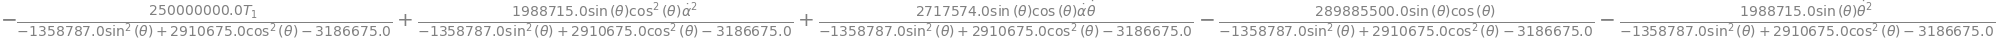

In [16]:
# Equations of Theta'' and Alpha''
eq = solve([eq1,eq2],(theta_double_dot,alpha_double_dot))
eq[alpha_double_dot]

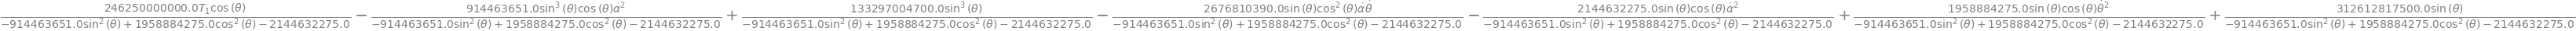

In [17]:
eq[theta_double_dot]

In [18]:
# Equilibrium points
# equilibrium_points = solve([eq[alpha_double_dot],eq[theta_double_dot],alpha_dot,theta_dot],(alpha_dot,alpha,theta_dot,theta))
# equilibrium_points



In [19]:
# All four functions
equations = Matrix([eq[alpha_double_dot],alpha_dot,eq[theta_double_dot],theta_dot])
equations

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                  246250000000.0⋅T₁⋅cos(θ)                                   
⎢─────────────────────────────────────────────────────────── - ───────────────
⎢                 2                      2                                    
⎢- 914463651.0⋅sin (θ) + 1958884275.0⋅cos (θ) - 2144

In [20]:
X = Matrix([alpha_dot, alpha, theta_dot, theta])
X

⎡α̇⎤
⎢ ⎥
⎢α⎥
⎢ ⎥
⎢θ̇⎥
⎢ ⎥
⎣θ⎦

In [110]:
JA = equations.jacobian(X)
A = JA.subs({alpha_dot:0, alpha:0, theta_dot:0, theta:0, T1:T1, T2:0})
A

⎡0  0  0   1050.3097826087 ⎤
⎢                          ⎥
⎢1  0  0          0        ⎥
⎢                          ⎥
⎢0  0  0  -1682.99425835002⎥
⎢                          ⎥
⎣0  0  1          0        ⎦

In [22]:
U = Matrix([T1])
U

[T₁]

In [112]:
JB = equations.jacobian(U)
B = JB.subs({alpha_dot:0, alpha:0, theta_dot:0, theta:0, T1:T1, T2:0})
B

⎡905.797101449275 ⎤
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎢-1325.72086913453⎥
⎢                 ⎥
⎣        0        ⎦

In [24]:
# Controlibilty
C = ct.ctrb(A, B)
np.linalg.matrix_rank(C)

4

In [109]:
Q=[[1,0,0,0],
   [0,1,0,0],
   [0,0,100,0],
   [0,0,0,10]]
R = [5]
K, S, E = ct.lqr(A, B, Q, R)
K = K[0]
K


array([  0.63815039,   0.4472136 ,  -4.05026628, -21.80609641])